# 16 QAM DSP ML SVM

In [27]:
%pylab inline
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ..

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion


In [5]:
cd QAM4bit/

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\QAM4bit


## Load  Data

In [6]:
data = loadtxt('OutRx_DualPol4bOSNR15R2.txt',delimiter=';')
Code=loadtxt('PBRSout.txt',skiprows=5)

# Functions

In [7]:
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [8]:
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]

In [9]:
def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))
            

## Training data 

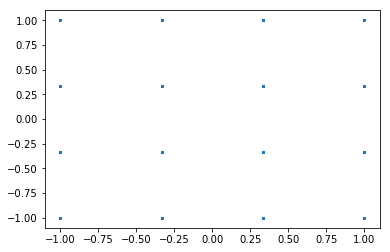

In [10]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=1)

### Simple splice DSP

In [11]:
done=data[1::2][:]
shape(done)

(32768, 4)

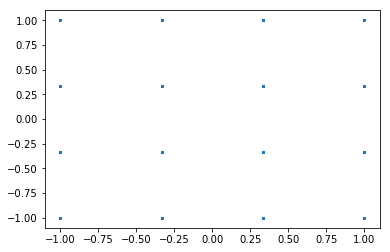

In [12]:
data=done
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=1)

## PBRS reformating

### Retrive PBRS creat Classification vector 

In [13]:
INT=[]
for i in range(int(len(Code)/4)):
    INT.append(i*4)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))
Word=[]
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3])
    
vec=array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1]
           ,[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])   
Org=[]
for i in range(len(vec)):
    Org.append(''.join(str(x) for x in vec[i]))

In [14]:
Map=zeros(len(Word))
ColorMap(Word,Map,16)

## Complete Incoming Data

In [15]:
#Normalize IQ data after splice
DataSet=zeros((len(data[:,0]),2))
NormData(DataSet,data)

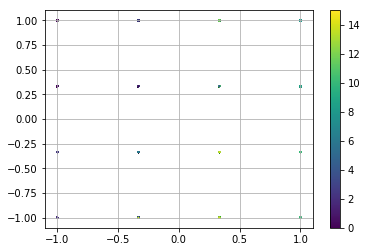

In [16]:
scatter(DataSet[:,0],DataSet[:,1],c=Map,s=1)
colorbar()
grid(True)

## ML training SVM

In [17]:
X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)

In [28]:
#### Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters ={'C': stats.expon(scale=10), 'gamma': stats.expon(scale=.01),
                   'kernel': ['rbf'], 'class_weight':['balanced', None]}

scores = ['precision']#, 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(SVC(), tuned_parameters, cv=4,
                       scoring='%s_macro' % score, n_jobs=-1, error_score=0,n_iter=20)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1.0414554783389918, 'class_weight': 'balanced', 'kernel': 'rbf', 'gamma': 0.014648777661663668}

Grid scores on development set:

0.610 (+/-0.005) for {'C': 1.0414554783389918, 'class_weight': 'balanced', 'kernel': 'rbf', 'gamma': 0.014648777661663668}
0.610 (+/-0.005) for {'C': 3.3797018466494406, 'class_weight': 'balanced', 'kernel': 'rbf', 'gamma': 0.0026253748324209579}
0.579 (+/-0.058) for {'C': 18.831381717415951, 'class_weight': None, 'kernel': 'rbf', 'gamma': 0.0057782309558648791}
0.004 (+/-0.000) for {'C': 0.33008375563199971, 'class_weight': None, 'kernel': 'rbf', 'gamma': 0.00021318849452782774}
0.579 (+/-0.058) for {'C': 11.332338093131245, 'class_weight': 'balanced', 'kernel': 'rbf', 'gamma': 0.005008019851992178}
0.610 (+/-0.005) for {'C': 6.2846683372154857, 'class_weight': None, 'kernel': 'rbf', 'gamma': 0.001991299849056819}
0.137 (+/-0.003) for {'C': 1.0031817023794702, 'cla

In [101]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1, error_score=0)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}

Grid scores on development set:

0.133 (+/-0.013) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.004 (+/-0.000) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.610 (+/-0.014) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.135 (+/-0.008) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.562 (+/-0.044) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.610 (+/-0.014) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.537 (+/-0.046) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.562 (+/-0.044) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       1.00      0.04      0.08       408
        1.0       0.57      0.34      0.43       415
        2.0       

In [95]:
svclassifier = SVC(kernel='rbf',C=1000,gamma=0.0001)
svclassifier.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing data set

dataTest=dataTest[1::2][:]

DataSetTest=zeros((len(dataTest[:,0]),2))
NormData(DataSetTest,dataTest)

CodeWordT=[]
for i in range(len(CodeTest)):
    CodeWordT.append(str(int(CodeTest[i])))
WordT=[]
for i in INT:
    WordT.append(CodeWordT[i]+CodeWordT[i+1]+CodeWordT[i+2]+CodeWordT[i+3])

MapT=zeros(len(WordT))
ColorMap(WordT,MapT,16)

scatter(dataTest[:,0]/max(dataTest[:,0]),dataTest[:,1]/max(dataTest[:,1]),c=MapT,s=1)
colorbar()
grid(True)

## Predict on data

In [96]:
y_prediction= svclassifier.predict(X_test)

In [97]:
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

[[ 18 104   0   0  53 233   0   0   0   0   0   0   0   0   0   0]
 [  0 143   0   3   0 266   0   3   0   0   0   0   0   0   0   0]
 [  0   0  25 102   0   0  54 218   0   0   0   0   0   0   0   0]
 [  0   4   0 129   0   7   0 234   0   0   0   0   0   0   0   0]
 [  0   0   0   0  72 346   0   0   0   0   0   0   2   5   0   0]
 [  0   0   0   0   0 444   0  12   0   0   0   0   0   9   0   0]
 [  0   0   0   0   0   0  93 319   0   0   0   0   0   0   4   3]
 [  0   0   0   0   0   6   0 405   0   0   0   0   0   1   0   3]
 [  0   0   0   0   0   0   0   0  24  94   0   0  47 240   0   0]
 [  0   0   0   0   0   0   0   0   0  95   1   0   0 283   0   6]
 [  0   0   0   0   0   0   0   0   0   0 143   0   0   0  49 234]
 [  0   0   0   0   0   0   0   0   0   4 125   0   0   4   0 311]
 [  0   0   0   0   1   5   0   0   0   0   0   0  65 313   0   0]
 [  0   0   0   0   0   3   0   0   0   0   0   0   0 384   0   7]
 [  0   0   0   0   0   0   5   7   0   0   0   0   0   0  85 

C:\Users\ChiefGuti\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [98]:
BER(y_test,y_prediction)

0.6161122978333842

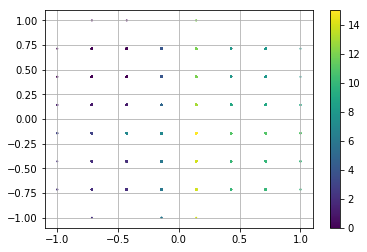

In [64]:
scatter(X_test[:,0],X_test[:,1],c=y_prediction,s=1)
colorbar()
grid(True)

In [66]:
13663/32768

0.416961669921875